Aquesta base de dades recull les diferents candidatures a llocs de feina i quina persona hi ha accedit.

En aquest cas mantenim tan sols la columna **ata d’inici de contracte** més recent per posteriorment calcular el temps que ha trigat la persona a trobar feina.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ('Candidatures.csv',encoding='utf-8',sep=';')
df_i=df
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [3]:
df=df[['stic_job_applications_contactscontacts_ida','Estat','Data inici de contracte o col·locació']]
df.head()

,stic_job_applications_contactscontacts_ida,Estat,Data inici de contracte o col·locació
0,704479ea-d2a7-181c-b77b-5db827b9a0ea,Acceptada,19/11/2018
1,1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92,Acceptada,22/04/2021
2,d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3,Acceptada,31/12/2019
3,1c7da56d-7fe8-9075-871e-5e0dc54da398,Presentada,NaN
4,c1142452-aaf4-4e8b-dd93-5fd336468e08,Prevista presentació,NaN


In [4]:
#seleccionar filas con estat = Acceptada en df
df_accepted=df[df['Estat']=='Acceptada']

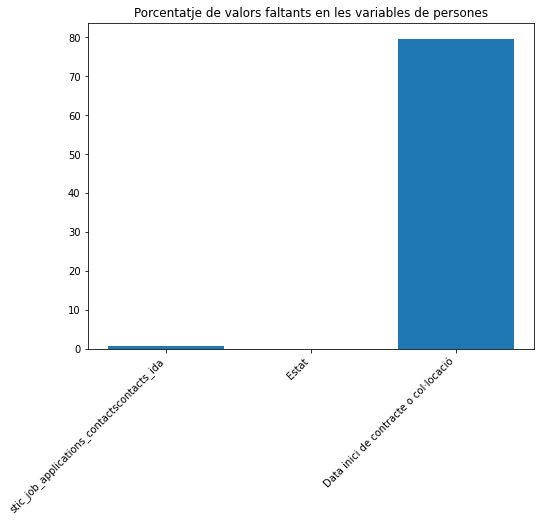

In [5]:
#ver porcentaje de nans por columna
df_accepted.isnull().sum()/df_accepted.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de persones')
plt.show()

In [6]:
df.dtypes

stic_job_applications_contactscontacts_ida    object
Estat                                         object
Data inici de contracte o col·locació         object
dtype: object

In [7]:
#Data inici de contracte o col·locació a datatime
df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])

/tmp/ipykernel_13693/1420689585.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])
/tmp/ipykernel_13693/1420689585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])


In [8]:
df_data=df.dropna(subset=['Data inici de contracte o col·locació'])

In [9]:
print (df_accepted.shape)
print (df_data.shape)

(264, 3)
(235, 3)


In [10]:
#Mantener solo con estado = Acceptada
df=df[df['Estat']=='Acceptada']

In [11]:
#cambiar nombre stic_job_applications_contactscontacts_ida a ID
df.rename(columns={'stic_job_applications_contactscontacts_ida':'ID'},inplace=True)


In [12]:
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

,ID,Estat,Data inici de contracte o col·locació
0,704479ea-d2a7-181c-b77b-5db827b9a0ea,Acceptada,2018-11-19
1,1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92,Acceptada,2021-04-22
2,d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3,Acceptada,2019-12-31
5,c5e7d4e3-8143-8639-7414-5bf443c1273e,Acceptada,2019-05-23
6,16fb0634-bed1-9fe7-2136-5c29e8d66421,Acceptada,NaT


In [15]:
#cantidad de duplicados por la columna ID
df.duplicated(['ID']).sum()


143

In [16]:
df = df.sort_values(by=['ID', 'Data inici de contracte o col·locació'], ascending=False)


In [17]:
df.head()

,ID,Estat,Data inici de contracte o col·locació
954,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,2022-05-15
985,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,2022-01-02
87,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,2021-06-04
783,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,NaT
918,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,NaT


In [18]:
# Elimina los duplicados, manteniendo solo el primer registro
df = df.drop_duplicates(subset=['ID'], keep='first') 

In [19]:
#duplicados en ID
df.duplicated(['ID']).sum()

0

In [20]:
#eliminar filas con nulls en ID
df=df.dropna(subset=['ID'])
df.head()

,ID,Estat,Data inici de contracte o col·locació
954,f3df28a7-263c-adc9-b014-5df777fa7700,Acceptada,2022-05-15
955,f239a3c4-c428-3ce1-ec5a-5ce6862fc33c,Acceptada,2022-05-23
1100,ee94feb1-9faf-014c-7827-620508e2e108,Acceptada,2022-10-24
920,ede6d171-45ca-6835-e369-601d10976d94,Acceptada,NaT
749,e3e8045e-e684-b056-3187-5bf7c92c95f0,Acceptada,2022-03-21


In [21]:
df=df[[ 'ID','Data inici de contracte o col·locació']]

In [22]:
df.isnull().sum()/df.shape[0]*100

ID                                       0.0
Data inici de contracte o col·locació    5.0
dtype: float64

In [25]:
#pasar df a csv
df.to_csv ('Candidatures_final.csv',index=False,encoding='utf-8')